In [2]:
from NNetwork.NNetwork import NNetwork
import numpy as np
import pandas as pd
import networkx as nx
import random
import seaborn as sns

In [1]:
"""input: graph G, current state s (array), k(color FCA), number of iteration"""
def FCA(G, s, k, iteration):
    b = (k-1)//2 #blinking color
    ret = s
    s_next = np.zeros(G.number_nodes)
    for h in range(iteration):
        if h != 0:
            s = s_next #update to the newest state
            ret = np.vstack((ret, s_next))
        s_next = np.zeros(G.number_nodes)
        for i in range(G.number_nodes):
            flag = False #true if inhibited by the blinking neighbor
            if s[i]>b:
                for j in range(G.number_nodes):
                    if s[j] == b and G.vertices[j] in G.neighbors(G.vertices[i]):
                        flag = True
                if flag:
                    s_next[i] = s[i]
                else:
                    s_next[i] = (s[i]+1)%k
            else:
                s_next[i] = (s[i]+1)%k
    return ret

In [121]:
edgelist = [['a', 'b']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [0, 2], 4, 10)
ret

array([[0., 2.],
       [1., 3.],
       [2., 3.],
       [3., 0.],
       [0., 1.],
       [1., 2.],
       [2., 2.],
       [3., 3.],
       [0., 0.],
       [1., 1.]])

In [122]:
ret = FCA(G, [1, 3], 6, 10)
ret

array([[1., 3.],
       [2., 4.],
       [3., 4.],
       [4., 5.],
       [5., 0.],
       [0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 3.],
       [4., 4.]])

<AxesSubplot:>

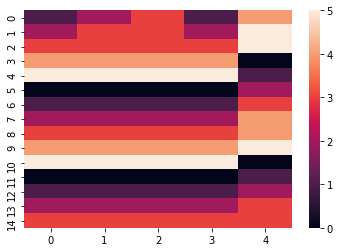

In [20]:
edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [1, 2, 3, 1, 4], 6, 15)

In [124]:
edgelist = [['1', '0'], ['2', '0'], ['3', '0'], ['4', '0'], ['5', '0'], ['6', '0']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [3, 0, 1, 2, 3, 4, 5], 6, 3)
ret

array([[3., 0., 1., 2., 3., 4., 5.],
       [4., 1., 2., 3., 4., 5., 0.],
       [5., 2., 3., 4., 5., 0., 1.]])

In [125]:
edgelist = [['0', '2'], ['0', '4'], ['0', '5'], ['2', '4'], ['2', '5'], ['5', '4']]
G = NNetwork()
G.add_edges(edgelist)
ret = FCA(G, [0,2,4,5], 6, 3)
ret

array([[0., 2., 4., 5.],
       [1., 3., 4., 5.],
       [2., 4., 5., 0.]])

<AxesSubplot:>

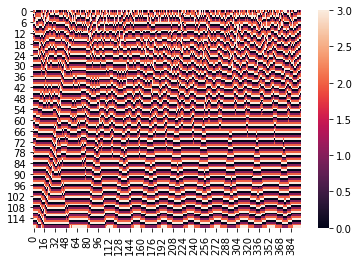

In [4]:
#generate a grid 2d graph with 400 nodes
G = nx.grid_2d_graph(10, 40)
G.edges()
new_nodes = {e: n for n, e in enumerate(G.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in G.edges]
edgelist = [] #update the formate of edgelist to match with NNetwork input
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = NNetwork()
G.add_edges(edgelist)

S = []
for i in range(400):
    S.append(random.randint(0, 3))
ret = FCA(G, S, 4, 120)
df = pd.DataFrame(ret)
sns.heatmap(df)